<a href="https://colab.research.google.com/github/CarlosDPP/ABP_Data_Mining_SVM/blob/main/ABP_Data_Mining_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Modelo Básico*


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import svm 
from sklearn.datasets import make_blobs

In [ ]:
X,y = make_blobs(n_samples=40, centers=2, random_state=20)

In [ ]:
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X,y)

SVC(C=1, kernel='linear')

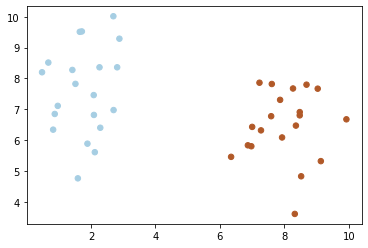

In [ ]:
plt.scatter(X[:, 0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)
plt.show()

In [ ]:
newData = [[3,4],[5,6]] # Crio uma variável, e passo um array de 2 posições contendo um range de 3,4 e 5,6
                        #O motivo de se utilizar um array de arrays é porque estamos lidando com varios dados.

print(clf.predict(newData))#A extrutura costuma receber um array com varias posições,mas neste exemplo estamos apenas
                           #passando 2 linhas para nossa predição.
                          

[0 1]


# *Modelo Completo*


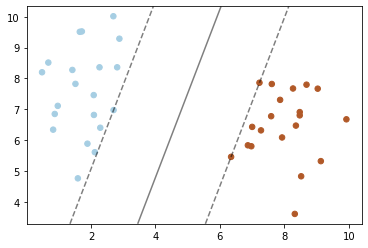

In [2]:
import numpy as np # Será utilizada por sua facilidade em lidar com um grande volume de dados e 
                   #possibilidade de criar arrays personalizados.

import matplotlib.pyplot as plt # Possibilita a criação de gráficos complexos com poucos comandos.

from sklearn import svm # o coração do nosso SVM utilizada para diversos fins de aprendizagem de máquina
                        # usaremos esta lib para aprender e inventar os nossos dados.

from sklearn.datasets import make_blobs # acessamos um dataset e criamos os blobs necessários.

X,y = make_blobs(n_samples=40, centers=2, random_state=20) # criamos 40 pontos separados, gerando assim 40 linhas
                                                           # cin 2 cebtris e um estado aleátorio de 20 pontos em cada uma das
                                                           #variáveis, os valos dos centros são de 0 ou 1.

clf = svm.SVC(kernel = 'linear', C= 1000) #Regulariza os dados para criar um plano e facilitar a visualização
clf.fit(X,y)                              #faremos isso pois nosso modelo possui uma quantidade pequena de dados
                                          #mas em modelos maiores isso não é executado.
                                          #caso fosse teria mais uma linha para valores entre -1 e 1.
                                        
plt.scatter(X[:, 0], X[:, 1], c=y , s=30, cmap=plt.cm.Paired) #criamos o grafico de dispersão, aqui entra o motivo de ser utilizado
                                                              #o numpyArray, seu funcionamento facilita a nossa vida porque 
                                                              #o make_blobs retonar um array numérico com outros arrays dentro.
                                                              #então os " : " são todas as linhas com nossos dados e os valores
                                                              #de 0 e 1  são as colunas.
                                                              #c=y é a cor e s=30 o intervalo.

ax = plt.gca() #etapa responsável por nossa visualização, aqui montaremos um grafico bonito e sugestivo
               # ax é uma variavel padrão quando se utiliza o plt, usamos ela para definir eixos e evitar
               # uma confusão, considerando que a estamos trabalhando com muitas camadas.
               #Faremos uma referencia ao nosso plt e mapearemos os nossos blobs.

xlim = ax.get_xlim() #Precisamos descobrir os limites do nosso gráfico e para isso vamos usar a função get_lim.

ylim = ax.get_ylim()# utlizamos o get_eixoLim para pegar o limite mais alto do nosso gráfico.


xx = np.linspace(xlim[0], xlim[1], 30) # depois de conseguir os 2 limites, nós precisamos criar uma grade para o gráfico
                                       # definimos a nossa variavel xx e limitamos o xlim[0] para zeor e depois o 
                                       # xlim[1] para 30.

yy = np.linspace(ylim[0], ylim[1], 30) #o mesmo acontece com o eixo yy.

# aqui nos estamos dizendo que os valores do nosso array numpy na posição XX e YY e criando pontos distintos entre 0 e o limite
YY, XX = np.meshgrid(yy, xx) #após definiro os limites, nos criaremos uma meshgrid passando os valores de yy e xx
                             #aqui nos passamos os valores do nosso NumpyArray na posição XX e YY e criamos pontos distintos
                             #entre 0 o nosso limite (30), isso tudo só é possivel por conta da lib Numpy.


xy = np.vstack([XX.ravel(),YY.ravel()]).T #com o meshgrid e seus pontos criados, nós usaremos a função vStack do numpY,
                                          #ela por sua vez vai empilhar os nossos todos os nossos pontos em um unico array.

Z = clf.decision_function(xy).reshape(XX.shape)# atribuiremos o nosso clf(svm) que treinamos a variavel Z
                                               # depois vamos chamar a função que é responsavel por tomar uma decisão,e para
                                               # ela, nós iremos passar os pontos xy e reformularemos eles para o formato dos
                                               #pontos XX, isso vai possibilitar uma conexão entre o eixo X e Y, o eixo Z vai 
                                               #ficar responsavel por saber em qual lado o nossos pontos estão.

ax.contour(XX,YY,Z,colors="k", levels=[-1,0,1], 
             alpha= 0.5, linestyles=['--','-', '--']) #Aqui plotaremos a nossa SVM, nós criamos as linhas xx, yy e z.
                                                      #setaremos uma cor qualquer e passamos os valores para as linhas ficarem
                                                      #na posição desejada, em seguida vamos dar um estilo para elas, e definir
                                                      # o tipo de cada linha.

ax.scatter(clf.support_vectors_[:, 0], 
           clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none') #Plotamos a nossa clf e passamos as linhas no eixo X e no eixo Y, S define o tamanho
                                           #das nossas bolinhas, line width a largura, e o facecolor colocamos como nenhum.

plt.show() # exibimos o resultado da nossa SVM.